In [148]:
# https://towardsdatascience.com/pandas-groupby-a-simple-but-detailed-tutorial-314b8f37005d
# https://towardsdatascience.com/accessing-data-in-a-multiindex-dataframe-in-pandas-569e8767201d
# https://towardsdatascience.com/summarizing-data-with-pandas-crosstab-efc8b9abecf
# https://towardsdatascience.com/how-to-flatten-multiindex-columns-and-rows-in-pandas-f5406c50e569
# https://datascientyst.com/list-aggregation-functions-aggfunc-groupby-pandas/
# https://stackoverflow.com/questions/25929319/how-to-iterate-over-pandas-multiindex-dataframe-using-index
# https://stackoverflow.com/questions/24495695/pandas-get-unique-multiindex-level-values-by-label
# https://stackoverflow.com/questions/55706391/pandas-crosstab-on-multiple-columns-then-groupby

# https://matplotlib.org/stable/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py

In [149]:
# # +++++++++ GROUPBY +++++++++ 
# df_f1 = df_f.groupby(['Date']).agg({'Date':['nunique'], 'Gross Sales':['sum']})
# df_f1.columns = df_f1.columns.droplevel(1)
# df_f1

# # +++++++++ FILTER +++++++++ selecting rows based on condition 
# df_f = df[(df['DOW'] == 4) & (df['TAVG'] > 60) & (df['TAVG'] < 65)] 
# df_f.head(1)

# +++++++++ GROUP DATES by WEEK +++++++++
# https://www.statology.org/pandas-group-by-week/
# https://stackoverflow.com/questions/45281297/group-by-week-in-pandas
# #convert date column to datetime and subtract one week
# df['date'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')
# #calculate sum of values, grouped by week
# df.groupby([pd.Grouper(key='date', freq='W')])['sales'].sum()

In [173]:
import sys
import pandas as pd
sys.path.append("C:/Users/ping/MyDrive/py_files/python/py379/")
from myUtils import pickle_load, pickle_dump
pd.set_option('max_colwidth', 12, 'display.max_columns', 18, 'display.width', 1200, 'display.max_rows', 100)
INPUT_DIR = 'C:/Users/ping/OneDrive/Documents/jenn_bb_sales'
PICS_DIR = INPUT_DIR + '/pics'
path_pickle_dump = f'{INPUT_DIR}/'

In [151]:
df = pickle_load(path_pickle_dump, 'df_item_sale_n_weather_cleaned')
rows_org, cols_org = df.shape[0], df.shape[1]
print(f'df.shape: {df.shape}, rows: {rows_org}, columns: {cols_org}')
print(f'df.columns: {df.columns}')

df.shape: (18007, 23), rows: 18007, columns: 23
df.columns: Index(['Date', 'Time', 'Category', 'Item', 'Qty', 'Gross Sales', 'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Event Type', 'Dining Option', 'Customer Name', 'NAME', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT08', 'DOW'], dtype='object')


In [152]:
ls_Date = df.Date.to_list()
Date_first, Date_last = ls_Date[0], ls_Date[-1]
print(f'first date: {Date_first}, last date: {Date_last}')
date_str = f' (data from {Date_first} to {Date_last})'
print(f'date_str: {date_str}')

first date: 2021-07-08, last date: 2022-09-04
date_str:  (data from 2021-07-08 to 2022-09-04)


In [153]:
l_object, l_float, l_int64, l_error = [], [], [], []
for column in df.columns:
  if df[column].dtype == 'object':
    l_object.append(column)
  elif df[column].dtype == 'float':
    l_float.append(column)  
  elif df[column].dtype == 'int64':
    l_int64.append(column)
  else:   
    l_error.append(column)
print(f'columns with dtypes are object:\n{l_object}')
print(f'columns with dtypes are float:\n{l_float}')
print(f'columns with dtypes are int64:\n{l_int64}')
print(f'columns with dtypes are non of the above:\n{l_error}')

columns with dtypes are object:
['Date', 'Time', 'Category', 'Item', 'Transaction ID', 'Event Type', 'Dining Option', 'Customer Name', 'NAME']
columns with dtypes are float:
['Qty', 'Gross Sales', 'Discounts', 'Net Sales', 'Tax', 'AWND', 'PRCP', 'TAVG', 'WT01', 'WT02', 'WT08']
columns with dtypes are int64:
['TMAX', 'TMIN', 'DOW']
columns with dtypes are non of the above:
[]


In [154]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

_figsize = (4,3)  # (width, height)
_fontsize = 6
_titlescale = 1.2  # scale title text
_grid = True  # default False
# _scale = 1

plt.rc('font', size=_fontsize) #controls default text size
plt.rc('axes', titlesize=_fontsize*_titlescale) #fontsize of the title
plt.rc('axes', labelsize=_fontsize) #fontsize of the x and y labels
plt.rc('xtick', labelsize=_fontsize) #fontsize of the x tick labels
plt.rc('ytick', labelsize=_fontsize) #fontsize of the y tick labels
plt.rc('legend', fontsize=_fontsize) #fontsize of the legend

days-of-week   days   total sales   avg. sales
Sun             41        33,257          811
Mon              7         1,935          276
Tue              4           717          179
Wed              6           796          133
Thu             21         4,260          203
Fri             54        35,728          662
Sat             53        54,220        1,023


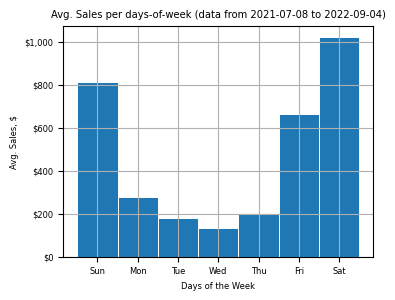

In [176]:
# Bar Graph, Avg. Gross Sales per day
_df = df.groupby(['DOW', 'Date']).agg('sum')
_l_day_of_week, _l_avg_gross_sales_per_day = [], []
_dict_DOW = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
print(f'days-of-week   days   total sales   avg. sales')
for DOW, _df_new in _df.groupby(level=0):
  _n_days = len(_df_new)
  _sum_gross_sales = _df_new['Gross Sales'].sum()
  _avg_gross_sales = _sum_gross_sales / _n_days
  # print(f'Day of Week: {DOW},   Avg Gross Sales per day: {_avg_gross_sales:>6,.0f}')
  _l_day_of_week.append(DOW)
  _l_avg_gross_sales_per_day.append(_avg_gross_sales)
  print(f'{_dict_DOW[DOW]:<11}{_n_days:>7}{_sum_gross_sales:>14,.0f}{_avg_gross_sales:>13,.0f}')

_xlabel = 'Days of the Week'
_ylabel = 'Avg. Sales' + ', $'
_title = 'Avg. Sales per days-of-week' + date_str
_file_pic = PICS_DIR + '/Avg_Sales_per_days-of-week.png'

# data
x = _l_day_of_week
y = _l_avg_gross_sales_per_day

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title)
ax.set_xticks(x)
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.rcParams["figure.figsize"] = _figsize
fmt = '${x:,.0f}'  # format number with $ and ,
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) # replace 0..6 with Sun ... Sat
plt.grid(_grid)
plt.savefig(_file_pic)
plt.show()

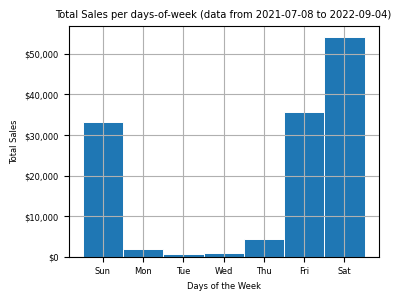

In [177]:
# Bar Graph, Gross Sales by days-of_week
_groupby_col, _agg_col = 'DOW', 'Gross Sales'
_agg_func = 'sum'
_cols = [_groupby_col, _agg_col]
_df = df[_cols]
_df = _df.groupby([_groupby_col]).agg([_agg_func])

_xlabel = 'Days of the Week'
_ylabel = 'Total Sales'
_title = 'Total Sales per days-of-week' + date_str
_file_pic = PICS_DIR + '/Total_Sales_per_days-of-week.png'

# data
x = _df.index
y = _df[_agg_col].values  # array([[33628.5], [ 1935. ], ..., [55169. ]])
y = list(np.concatenate(y).flat)  # [33628.5, 1935.0, 717.0, 795.5, 4500.0, 36615.5, 55169.0]

_dict_DOW = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
# print(f'day-of-week   total sales')
# for i in x:
#   print(f'{_dict_DOW[i]:<14}{y[i]:>11,.0f}')

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title)
ax.set_xticks(x)
ax.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.rcParams["figure.figsize"] = _figsize
fmt = '${x:,.0f}'  # format number with $ and ,
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) # replace 0..6 with Sun ... Sat
plt.grid(_grid)
plt.savefig(_file_pic)
plt.show()


Total Sales:                   130,912
Total Transaction:               6,793
Avg. Sales per Transaction:      19.27



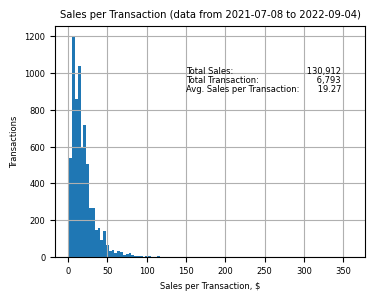

In [178]:
# Histogram, Gross Sales per Transaction
_groupby_col, _agg_col = 'Transaction ID', 'Gross Sales'
_agg_func = 'sum'

_cols = [_groupby_col, _agg_col]
_df = df[_cols]
_df = _df.groupby([_groupby_col]).agg([_agg_func])

Total_Gross_Sales = _df['Gross Sales'].sum()[0]  # get the first element in series
Total_Trans = len(_df)
Total_Trans
Avg_Sales_per_Trans = Total_Gross_Sales / Total_Trans

plt_text = \
f'''
Total Sales:                {Total_Gross_Sales:10,.0f}
Total Transaction:          {Total_Trans:10,}
Avg. Sales per Transaction: {Avg_Sales_per_Trans:10,.2f}
'''
print(plt_text)

_x = _df[_agg_col]
_bins = 100
_xlabel = 'Sales per Transaction, $'
_ylabel = 'Transactions'
_title = 'Sales per Transaction' + date_str
_file_pic = PICS_DIR + '/Sales_per_Transaction.png'

_density = False  # False => count, True => Area = 1 
n, bins, patches = plt.hist(_x, _bins, density=_density)
# plt.rcParams.update({'font.size': _fontsize})
plt.rcParams["figure.figsize"] = _figsize
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title)
plt.text(150, 1000, f'Total Sales:                         {Total_Gross_Sales:>10,.0f}')
plt.text(150, 950,  f'Total Transaction:                 {Total_Trans:>10,}')
plt.text(150, 900,  f'Avg. Sales per Transaction:  {Avg_Sales_per_Trans:>10,.2f}')
plt.grid(_grid)
plt.savefig(_file_pic)
plt.show()

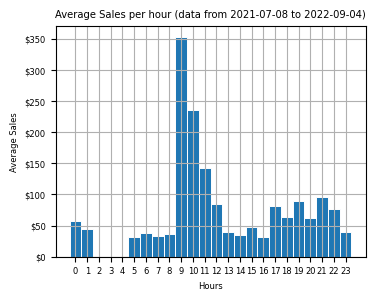

In [179]:
_df = df.sort_values(by=['Time', 'Date'])
_df.Time = pd.to_datetime(_df.Time)
_df = _df.groupby([_df['Time'].dt.hour, 'Date']).agg(sum)

# print('Hour    Transactions    Total Sales    Avg. Sales per Hr.')
_l_hr = []
_l_trans = []
_l_sales = []
_l_avg_sale = []
for Time, _df1 in _df.groupby(level=0):
  _hour = Time
  _transactions = len(_df1)
  _total_sales = _df1["Gross Sales"].agg(sum)
  _avg_sales_per_hr = _total_sales / _transactions
  _l_hr.append(_hour)
  _l_trans.append(_transactions)
  _l_sales.append(_total_sales)
  _l_avg_sale.append(_avg_sales_per_hr)
  # print(f'{Time:<4}    {_transactions:>12,.0f}    {_total_sales:>11,.0f}    {_avg_sales_per_hr:>16,.0f}')

_xlabel = 'Hours'
_ylabel = 'Average Sales'
_title = 'Average Sales per hour' + date_str
_file_pic = PICS_DIR + '/Average_Sales_per_hour.png'
# data
x = _l_hr
y = _l_avg_sale
# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title)
ax.set_xticks(range(24))
plt.rcParams["figure.figsize"] = _figsize
fmt = '${x:,.0f}'  # format number with $ and ,
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) # replace 0..6 with Sun ... Sat
plt.grid(_grid)
plt.savefig(_file_pic)
plt.show()

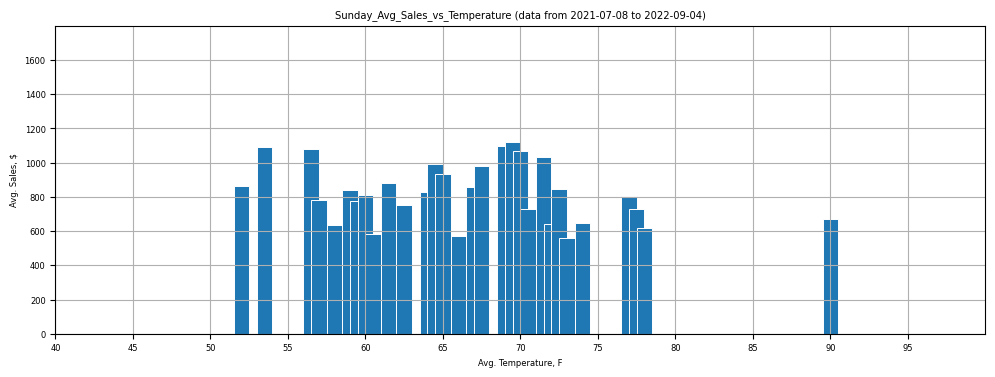

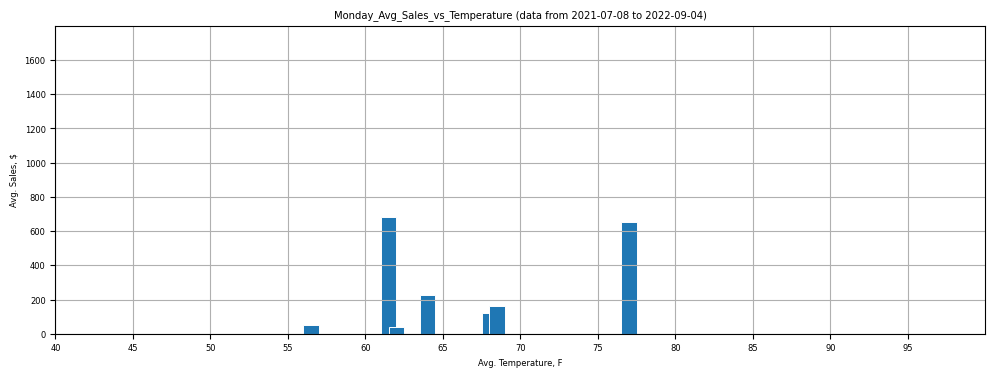

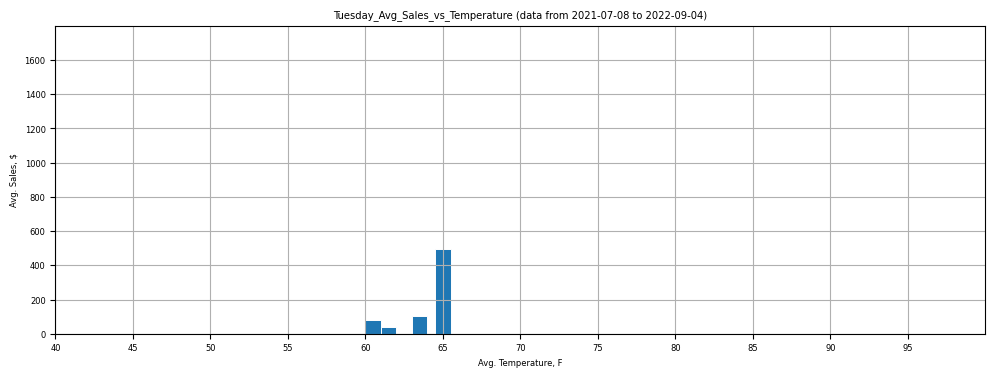

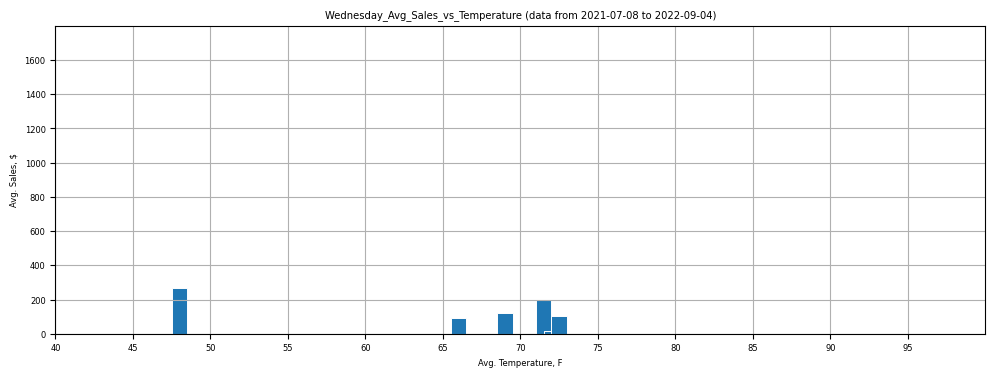

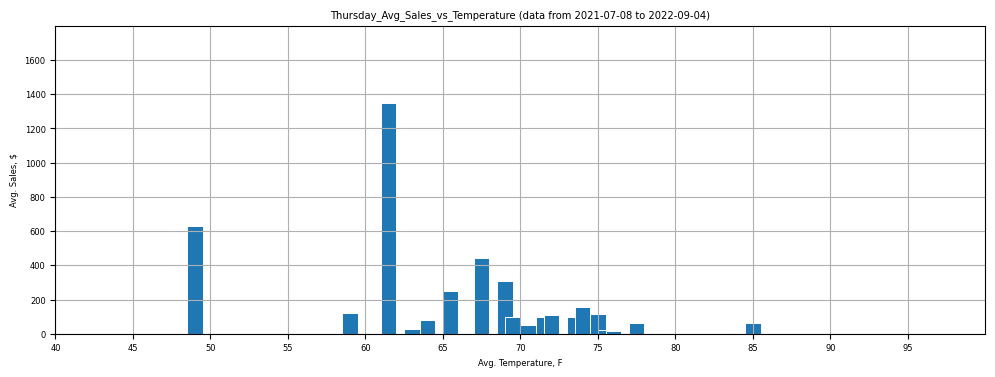

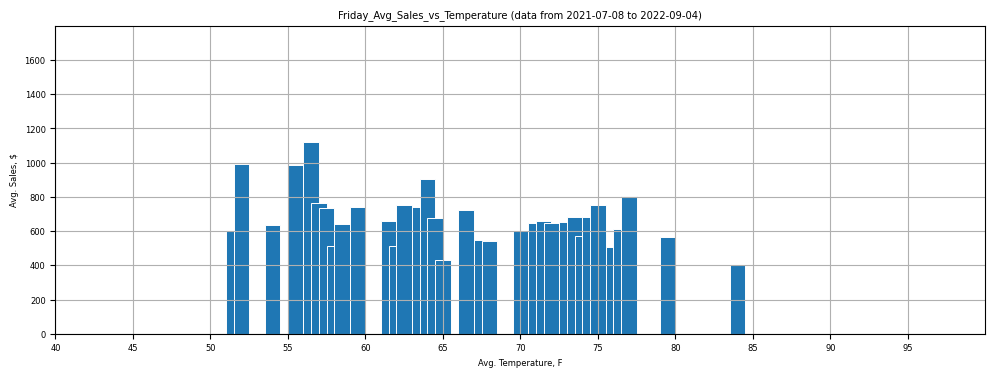

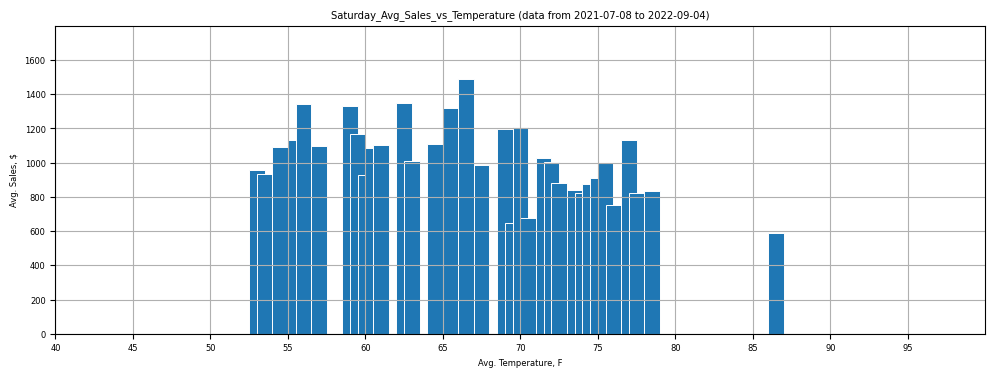

In [181]:
df1 = df[['DOW', 'TAVG', 'Date', 'Gross Sales']]
df2 = df1.groupby(['DOW', 'TAVG']).agg({'Date':['nunique'], 'Gross Sales':['sum']})
l_sales = df2.loc[(slice(None), 'Gross Sales')].values
l_date = df2.loc[(slice(None), 'Date')].values
l_sales.flatten()
l_date.flatten()
l_sales_per_day = l_sales / l_date
df2['Avg Sales'] = l_sales_per_day
df2.columns = df2.columns.droplevel(1)
df2 = df2.rename({'Date': 'Unique Date'}, axis=1)
df2 = df2[['Avg Sales']]
df2 = df2.reset_index()
ct = pd.crosstab(
        df2['DOW'], 
        df2['TAVG'], 
        values = df2['Avg Sales'],
        aggfunc = 'mean'
    ).round(0)
ct  # crosstab of days-of-week vs avg.-temp.

# Bar Graph, Gross Sales by days-of_week
for _DOW in ct.index:
  temp = ct.loc[_DOW].index
  avg_sales = np.nan_to_num(ct.loc[_DOW].values, copy=True, nan=0.0, posinf=None, neginf=None)
  _dict_DOW = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

  _xlabel = 'Avg. Temperature, F'
  _ylabel = f'Avg. Sales, $'
  _title = f'{_dict_DOW[_DOW]}_Avg_Sales_vs_Temperature' + date_str
  _file_pic = PICS_DIR + f'/{_dict_DOW[_DOW]}_Avg_Sales_vs_Temperature.png'

  # data
  x = temp
  y = avg_sales

  # plot
  fig, ax = plt.subplots()
  ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
  ax.set(xlim=(40, 100), xticks=np.arange(40, 100, 5),
         ylim=(0, 1800), yticks=np.arange(0, 1800, 200))
  plt.xlabel(_xlabel)
  plt.ylabel(_ylabel)
  plt.title(_title, fontsize = _fontsize*_titlescale)
  plt.rcParams["figure.figsize"] = (12, 4)
  plt.grid(True)
  plt.savefig(_file_pic)
  plt.show()

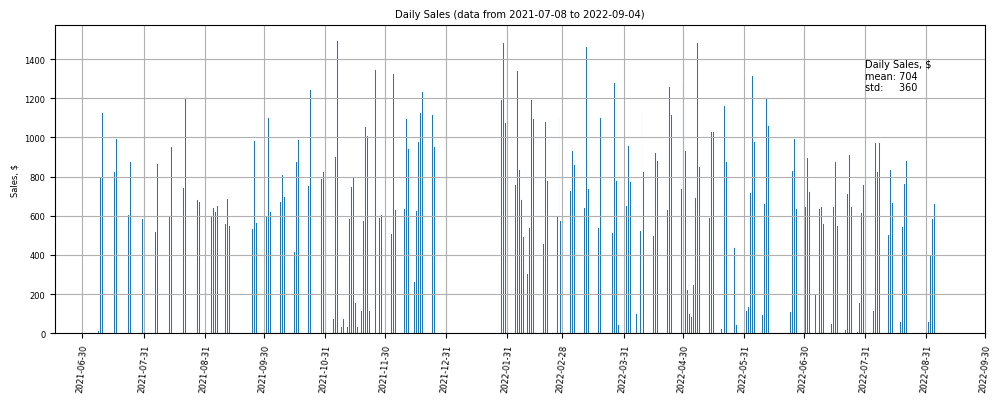

In [182]:
df_d = df[['Date', 'Gross Sales']]
df_d = df_d.groupby(['Date']).agg({'Gross Sales':['sum']})
df_d.tail()
df_d.columns = df_d.columns.droplevel(1)
df_d.tail()
# Converting the index as date
df_d.index = pd.to_datetime(df_d.index)
# df_d.info()
# print(df_d.head())
# print(df_d.tail())

_xlabel = ''
_ylabel = f'Sales, $'
_title = f'Daily Sales' + date_str
_file_pic = PICS_DIR + f'/Daily_Sales.png'

# data
x = df_d.index
y = df_d['Gross Sales']
_mean = np.mean(y)
_std = np.std(y)
msg = f'''Daily Sales, $\nmean: {_mean:,.0f}\nstd:     {_std:,.0f}'''

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title)
x_tick = pd.date_range('2021-06-01', '2022-10-01', freq='M')
ax.set_xticks(x_tick)
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = (12, 4)
plt.text(x_tick[-3], 1400, msg, fontsize=7, ha='left', va='top')
plt.grid(True)
plt.savefig(_file_pic)
plt.show()

              Date     Qty  Gross Sales  Avg_Sales_per_day  Avg_Qty_per_day
Item                                                                       
Danish         146  4618.0      30605.0   209.623288          31.630137    
Chocolate...   163  3133.0      20749.0   127.294479          19.220859    
Croissant      164  2709.0      15210.0    92.743902          16.518293    
Chocolate...   160  2072.0       8736.0    54.600000          12.950000    
Double Ch...   153  1441.0       6014.0    39.307190           9.418301    
Cinnamon ...   153  1971.0       5593.0    36.555556          12.882353    
Twice Baked    105   804.0       5504.0    52.419048           7.657143    
Jarred Pa...   133   706.0       4468.0    33.593985           5.308271    
Furikake Crx    77   574.0       4018.0    52.181818           7.454545    
Coffee Cake     82   642.0       3663.0    44.670732           7.829268    
Muffin          60   611.0       2444.0    40.733333          10.183333    
Box         

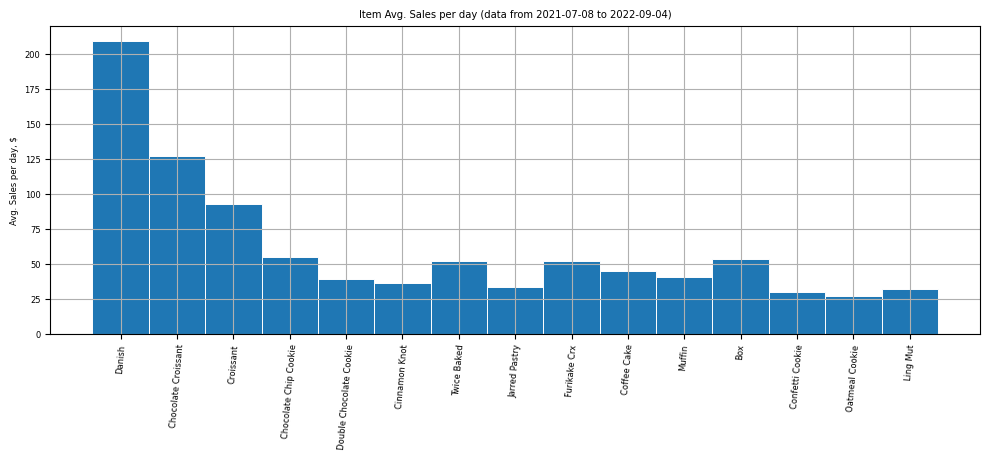

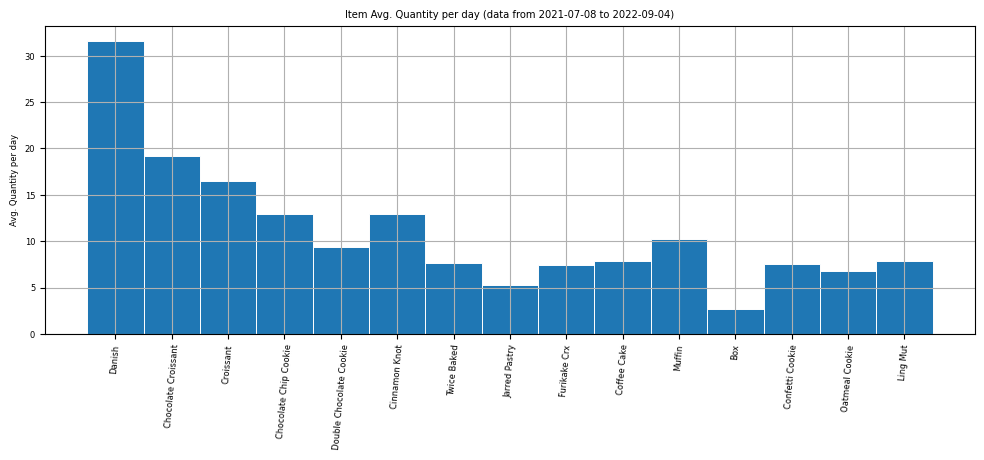

In [183]:
df_item = df[['Item', 'Date', 'Qty', 'Gross Sales']]
df_item
df_item_g = df_item.groupby(['Item']).agg({'Date':['nunique'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_item_g
df_item_g.columns = df_item_g.columns.droplevel(1)
df_item_g = df_item_g.sort_values(by = ['Gross Sales'], ascending=False)
df_item_g = df_item_g.head(15)
df_item_g['Avg_Sales_per_day'] = df_item_g['Gross Sales'] / df_item_g['Date'] 
df_item_g['Avg_Qty_per_day'] = df_item_g['Qty'] / df_item_g['Date'] 
print(df_item_g)

_xlabel = ''
_ylabel = f'Avg. Sales per day, $'
_title = f'Item Avg. Sales per day' + date_str
_file_pic = PICS_DIR + f'/Item_Avg_Sales_per_day.png'

# data
x = df_item_g.index
y = df_item_g['Avg_Sales_per_day']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = (12, 4)
plt.grid(True)
plt.savefig(_file_pic)
plt.show()

#########
_xlabel = ''
_ylabel = f'Avg. Quantity per day'
_title = f'Item Avg. Quantity per day' + date_str
_file_pic = PICS_DIR + f'/Item_Avg_Quantity_per_day.png'

# data
x = df_item_g.index
y = df_item_g['Avg_Qty_per_day']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = (12, 4)
plt.grid(True)
plt.savefig(_file_pic)
plt.show()

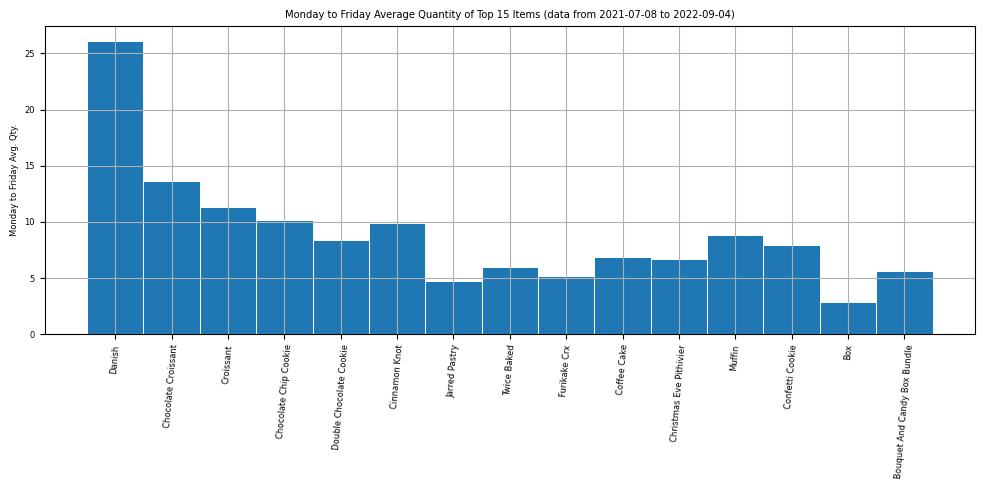

In [184]:
df_dow = df[['DOW', 'Item', 'Date', 'Qty', 'Gross Sales']]
df_dow
df_dow_g = df_dow.groupby(['DOW', 'Item']).agg({'Date':['nunique'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_15 =df_dow_g.loc[1:5]
df_15
df_15.columns = df_15.columns.droplevel(1)  # drop sum in column index
# df_15.index = df_15.index.droplevel(0)  # drop DOW in row index
df_15 = df_15.groupby(['Item']).agg({'Date':['sum'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_15.columns = df_15.columns.droplevel(1)  # drop sum in column index
df_15['Avg_Sales_per_day'] = df_15['Gross Sales'] / df_15['Date'] 
df_15['Avg_Qty_per_day'] = df_15['Qty'] / df_15['Date'] 
df_15 = df_15.sort_values(by=['Gross Sales'], ascending=False)
df_15 = df_15.head(15)
df_15

_xlabel = ''
_ylabel = f'Monday to Friday Avg. Qty.'
_title = f'Monday to Friday Average Quantity of Top 15 Items' + date_str
_file_pic = PICS_DIR + f'/Monday_to_Friday_Average_Quantity_of_Top_15_Items.png'

# data
x = df_15.index
y = df_15['Avg_Qty_per_day']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = (12, 4)
plt.grid(True)
plt.savefig(_file_pic)
plt.show()

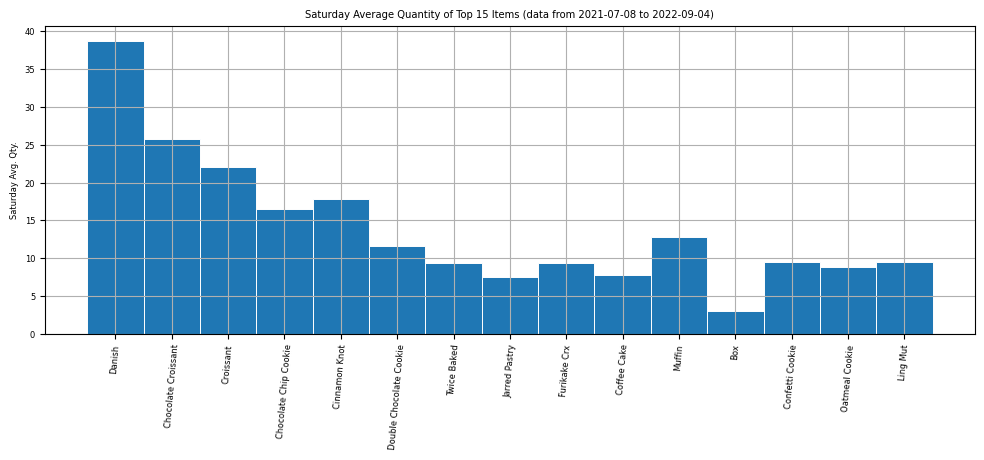

In [185]:
df_dow = df[['DOW', 'Item', 'Date', 'Qty', 'Gross Sales']]
df_dow
df_dow_g = df_dow.groupby(['DOW', 'Item']).agg({'Date':['nunique'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_6 =df_dow_g.loc[6]
df_6.columns = df_6.columns.droplevel(1)  # drop sum in column index
df_6 = df_6.groupby(['Item']).agg({'Date':['sum'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_6.columns = df_6.columns.droplevel(1)  # drop sum in column index
df_6['Avg_Sales_per_day'] = df_6['Gross Sales'] / df_6['Date'] 
df_6['Avg_Qty_per_day'] = df_6['Qty'] / df_6['Date'] 
df_6 = df_6.sort_values(by=['Gross Sales'], ascending=False)
df_6 = df_6.head(15)
df_6

_xlabel = ''
_ylabel = f'Saturday Avg. Qty.'
_title = f'Saturday Average Quantity of Top 15 Items' + date_str
_file_pic = PICS_DIR + f'/Saturday_Average_Quantity_of_Top_15_Items.png'

# data
x = df_6.index
y = df_6['Avg_Qty_per_day']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = (12, 4)
plt.grid(True)
plt.savefig(_file_pic)
plt.show()

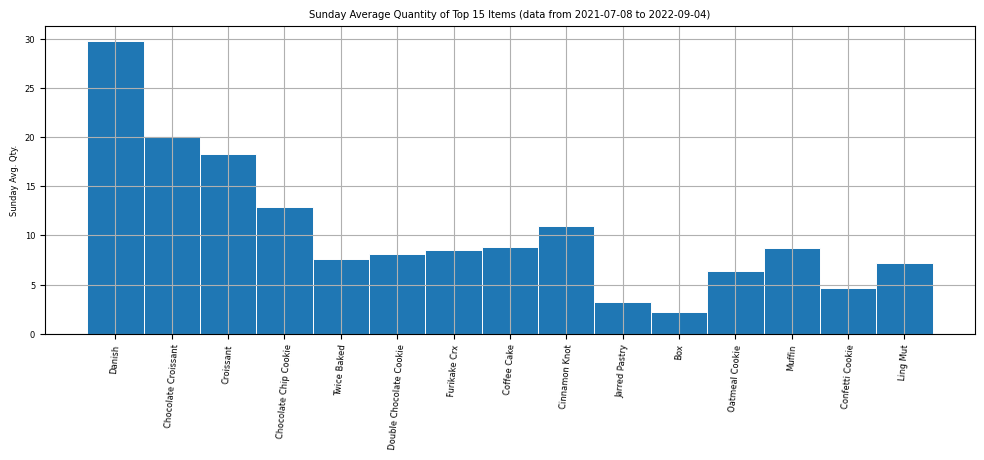

In [186]:
df_dow = df[['DOW', 'Item', 'Date', 'Qty', 'Gross Sales']]
df_dow
df_dow_g = df_dow.groupby(['DOW', 'Item']).agg({'Date':['nunique'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_0 =df_dow_g.loc[0]
# df_0
df_0.columns = df_0.columns.droplevel(1)  # drop sum in column index
# df_0.index = df_0.index.droplevel(0)  # drop DOW in row index
df_0 = df_0.groupby(['Item']).agg({'Date':['sum'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_0.columns = df_0.columns.droplevel(1)  # drop sum in column index
df_0['Avg_Sales_per_day'] = df_0['Gross Sales'] / df_0['Date'] 
df_0['Avg_Qty_per_day'] = df_0['Qty'] / df_0['Date'] 
df_0 = df_0.sort_values(by=['Gross Sales'], ascending=False)
df_0 = df_0.head(15)
df_0

_xlabel = ''
_ylabel = f'Sunday Avg. Qty.'
_title = f'Sunday Average Quantity of Top 15 Items' + date_str
_file_pic = PICS_DIR + f'/Sunday_Average_Quantity_of_Top_15_Items.png'

# data
x = df_0.index
y = df_0['Avg_Qty_per_day']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title, fontsize = _fontsize*_titlescale)
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = (12, 4)
plt.grid(True)
plt.savefig(_file_pic)
plt.show()

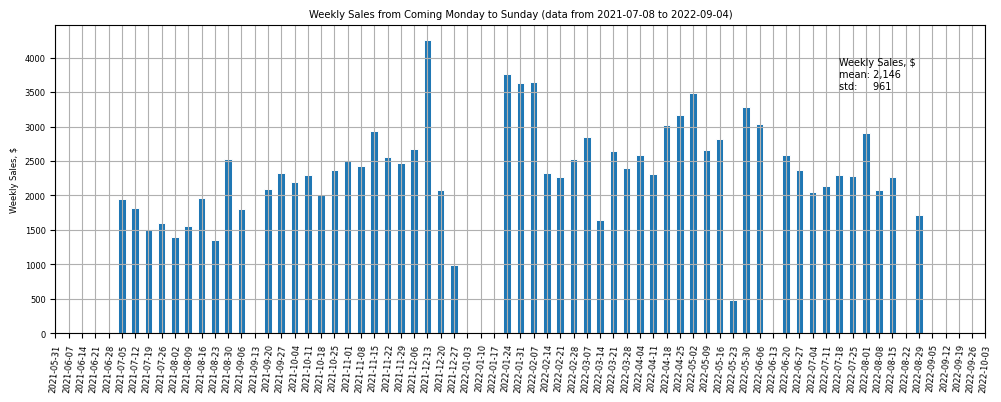

In [187]:
df_d = df[['Date', 'Gross Sales']]
df_d = df_d.groupby(['Date']).agg({'Gross Sales':['sum']})
df_d.tail()
df_d.columns = df_d.columns.droplevel(1)  # removed the 'sum' column level
df_d.tail()
# Converting the index as date
df_d.index = pd.to_datetime(df_d.index)
df_dw = df_d.copy()
df_dw.index = df_d.index - pd.to_timedelta(7, unit='d')
df_dw = df_dw.reset_index()
df_dw
s_wkly_sales = df_dw.groupby([pd.Grouper(key='Date', freq='W-MON')])['Gross Sales'].sum()
s_wkly_sales.tail()

_xlabel = ''
_ylabel = f'Weekly Sales, $'
_title = f'Weekly Sales from Coming Monday to Sunday' + date_str
_file_pic = PICS_DIR + f'/Weekly_Sales_from_Coming_Monday_to_Sunday.png'

# data
x = s_wkly_sales.index
y = s_wkly_sales.values
_mean = np.mean(y)
_std = np.std(y)
msg = f'''Weekly Sales, $\nmean: {_mean:,.0f}\nstd:     {_std:,.0f}'''

# plot
fig, ax = plt.subplots()
ax.bar(x, y, width=4, edgecolor="white", linewidth=0.7)
plt.xlabel(_xlabel)
plt.ylabel(_ylabel)
plt.title(_title)
# x_tick = pd.date_range('2021-06-01', '2022-10-01', freq='M')
# ax.set_xticks(x_tick)
x_tick = pd.date_range('2021-05-31', '2022-10-03', freq='W-MON')
ax.set_xticks(x_tick)
plt.xticks(rotation = 85)
plt.rcParams["figure.figsize"] = (12, 4)
plt.text(x_tick[-12], 4000, msg, fontsize=7, ha='left', va='top')
plt.grid(True)
plt.savefig(_file_pic)
plt.show()

#### Weekly Item Quantity, weeks starts on Monday

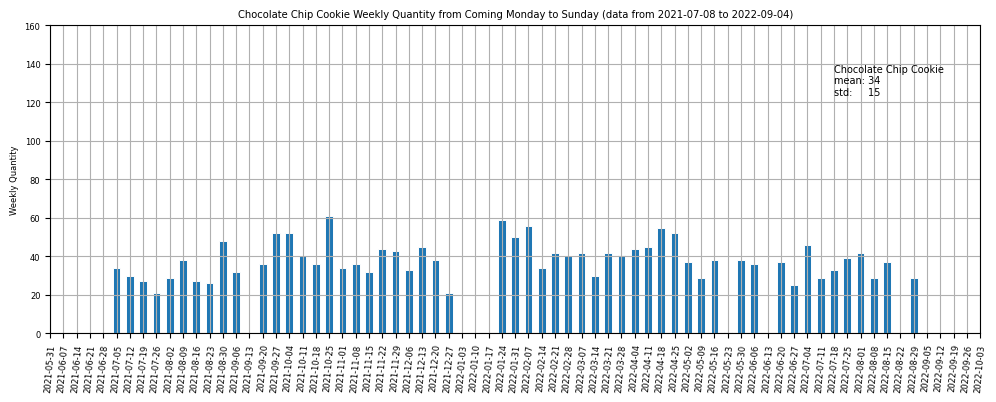

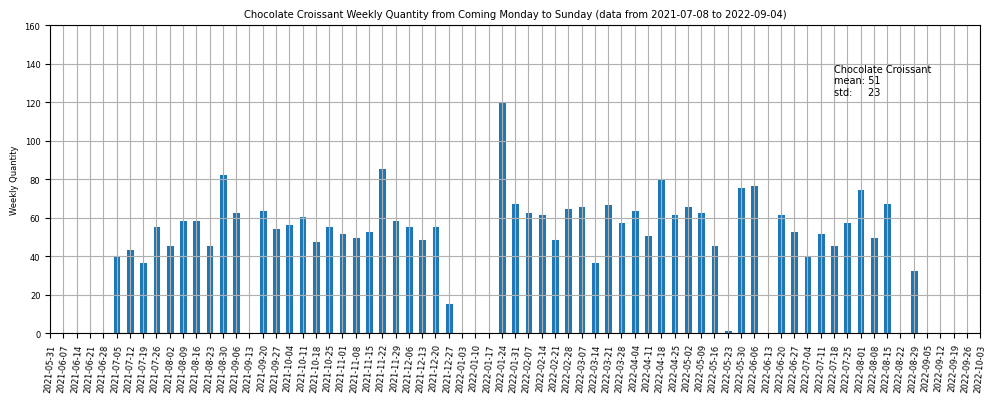

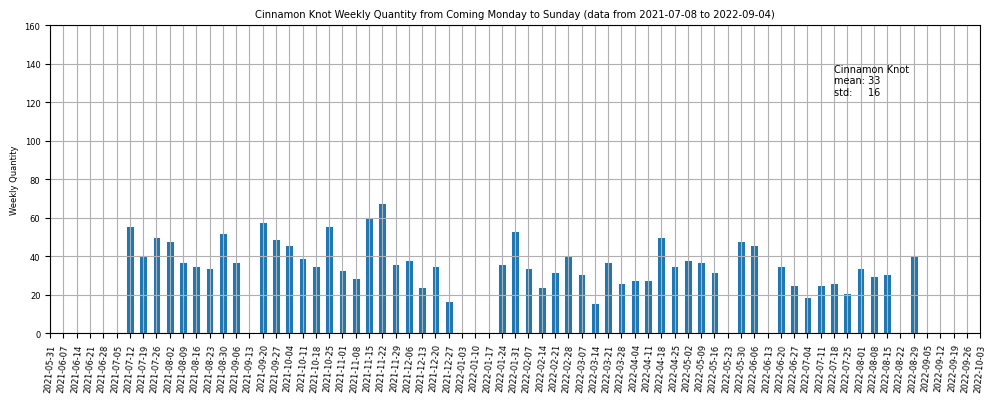

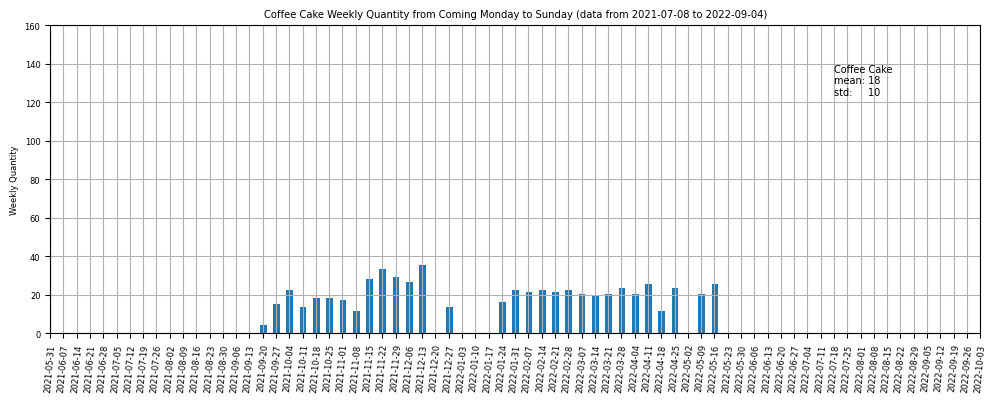

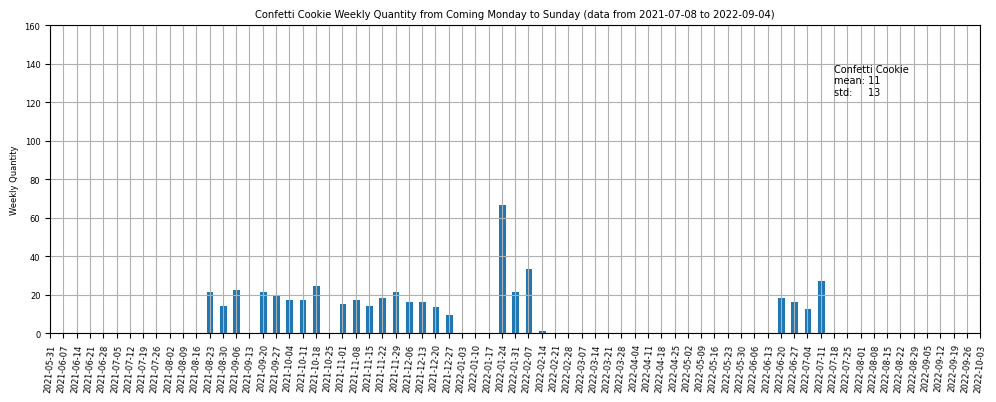

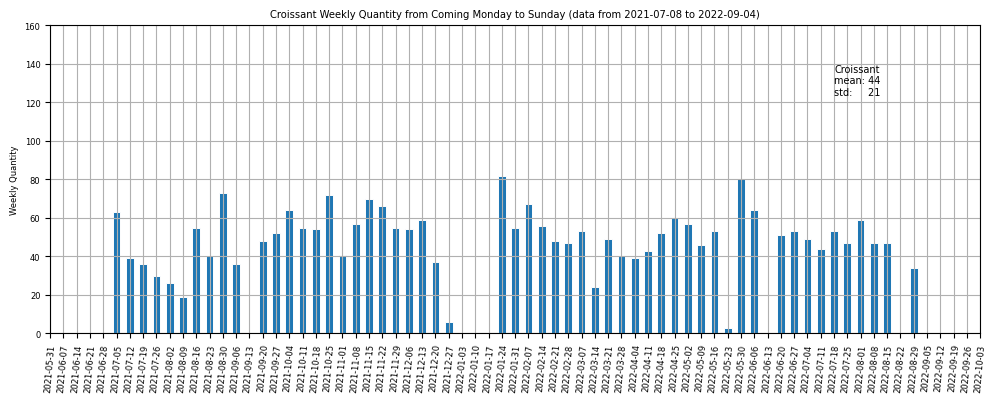

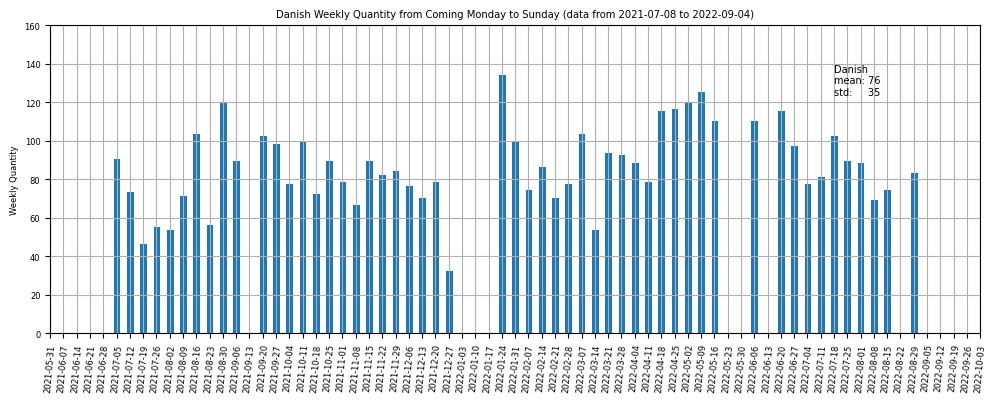

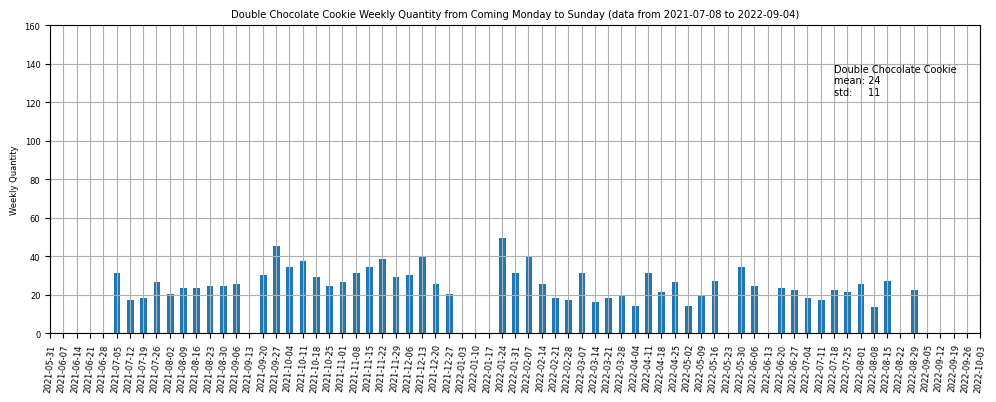

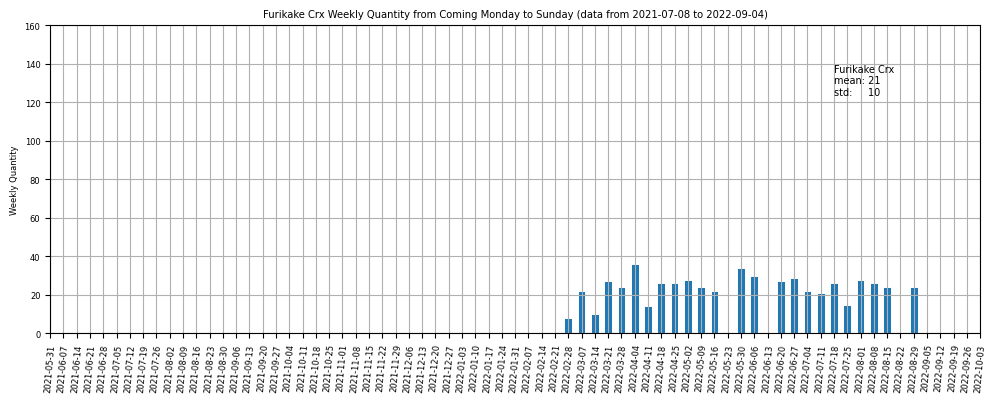

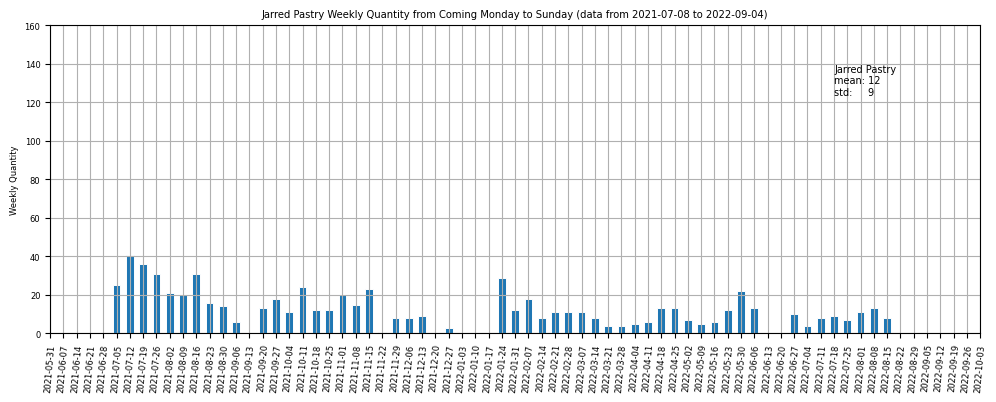

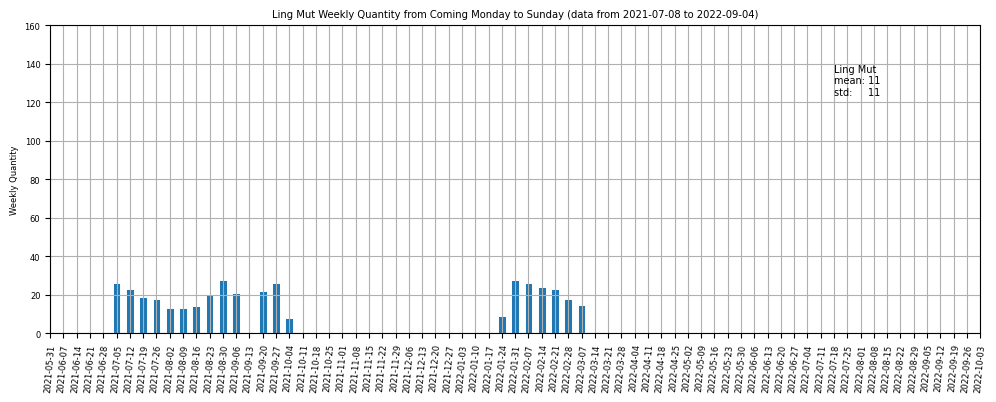

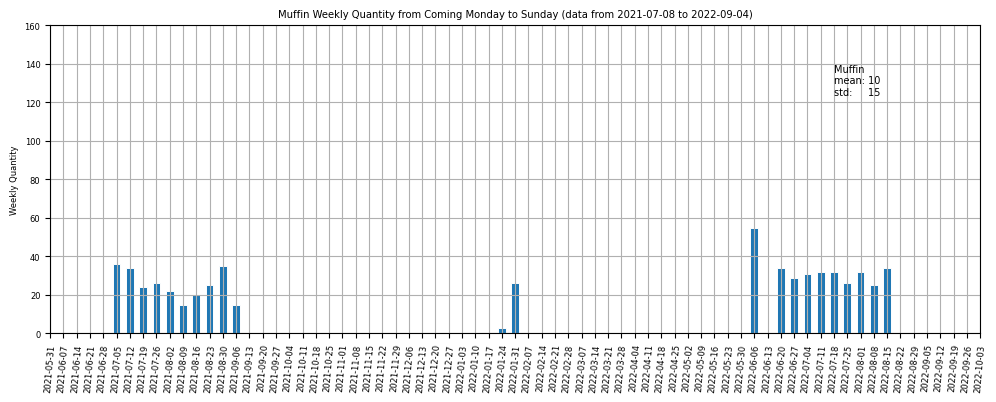

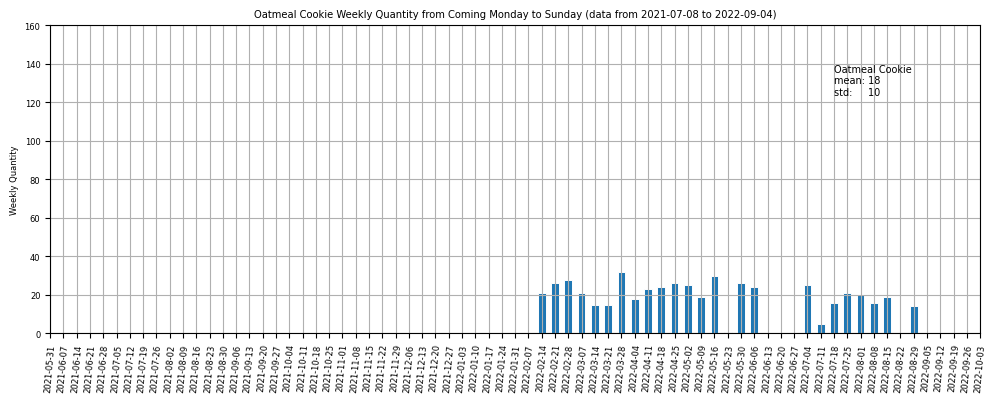

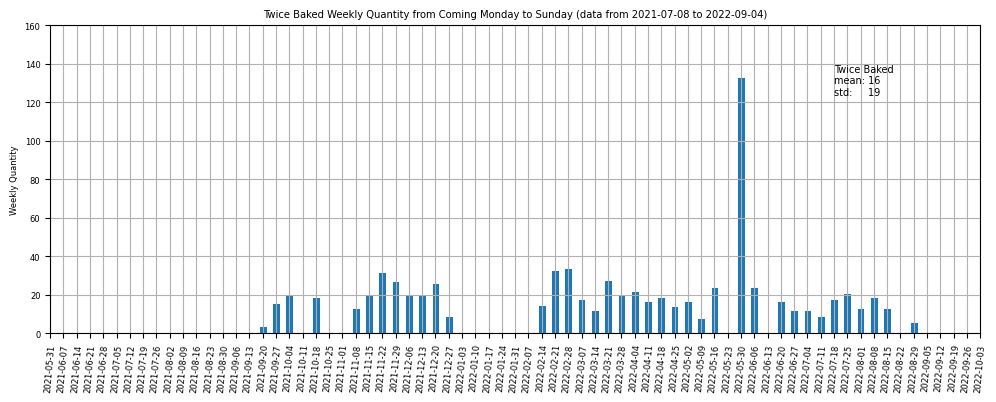

In [188]:
df_item = df[['Item', 'Date', 'Qty', 'Gross Sales']]
df_item
df_item_g = df_item.groupby(['Item']).agg({'Date':['nunique'], 'Qty':['sum'], 'Gross Sales':['sum']})
df_item_g
df_item_g.columns = df_item_g.columns.droplevel(1)
df_item_g = df_item_g.sort_values(by = ['Gross Sales'], ascending=False)
df_item_g = df_item_g.head(15)
l_items = list(df_item_g.index)
l_items_remove = ['Box']
l_items = list(set(l_items) - set(l_items_remove))
l_items = sorted(l_items)
df_item_g_item_date = df_item.groupby(['Item', 'Date']).agg({'Qty':['sum'], 'Gross Sales':['sum']})
df_item_g_item_date
df1 = df_item_g_item_date.loc[l_items]
df1 = df1.droplevel(level=1, axis=1)
df1

# for item in l_items[0:1]:
for item in l_items:
  _df = df1.loc[item]
  _df.index = pd.to_datetime(_df.index)
  _df.index = _df.index - pd.to_timedelta(7, unit='d')
  _df = _df.reset_index()
  _df
  s_wkly_qty = _df.groupby([pd.Grouper(key='Date', freq='W-MON')])['Qty'].sum()
  # print(s_wkly_sales)
  _xlabel = ''
  _ylabel = f'Weekly Quantity'
  # _title = f'{item} Weekly Quantity of Coming Week' + date_str
  _title = f'{item} Weekly Quantity from Coming Monday to Sunday' + date_str
  _file_pic = PICS_DIR + f'/{item}_Weekly_Quantity_from_Coming_Monday_to_Sunday.png'

  # data
  x = s_wkly_qty.index
  y = s_wkly_qty.values
  _mean = np.mean(y)
  _std = np.std(y)
  msg = f'''{item}\nmean: {_mean:.0f}\nstd:     {_std:.0f}'''

  # # plot
  fig, ax = plt.subplots()
  ax.bar(x, y, width=4, edgecolor="white", linewidth=0.7)
  plt.xlabel(_xlabel)
  plt.ylabel(_ylabel)
  plt.title(_title)
  x_tick = pd.date_range('2021-05-31', '2022-10-03', freq='W-MON')
  ax.set_xticks(x_tick)
  plt.xticks(rotation = 85)
  ax.set_ylim([0,160])
  plt.rcParams["figure.figsize"] = (12, 4)
  plt.text(x_tick[-12], 140, msg, fontsize=7, ha='left', va='top')
  plt.grid(True)
  plt.savefig(_file_pic)
  plt.show()